XGBoost test completed. Accuracy: 0.9561


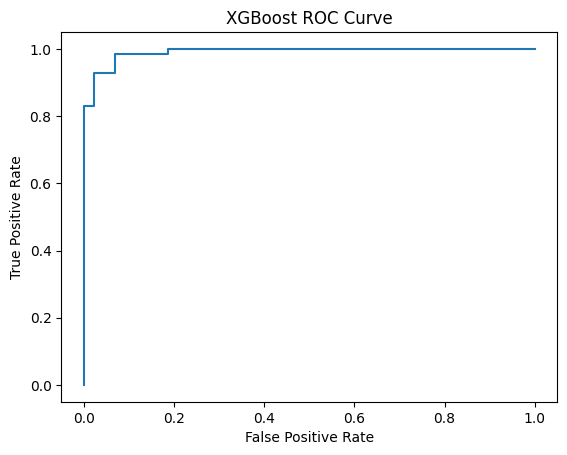

In [4]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Load sample dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DMatrix (XGBoost internal data format)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set simple parameters for binary classification
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'verbosity': 0
}

# Train the model for 10 rounds
bst = xgb.train(params, dtrain, num_boost_round=10)

# Make predictions (probabilities)
y_pred_prob = bst.predict(dtest)

# Convert probabilities to class labels (threshold 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"XGBoost test completed. Accuracy: {accuracy:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.show()


In [5]:
import xgboost as xgb
import numpy as np

# Tiny toy data: 4 samples, 2 features
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([0, 1, 0, 1])

dtrain = xgb.DMatrix(X, label=y)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'verbosity': 0
}

bst = xgb.train(params, dtrain, num_boost_round=2)

# Predict on training data itself
preds = bst.predict(dtrain)

print("Predictions:", preds)


Predictions: [0.5 0.5 0.5 0.5]
